# EDA & Feature Engineering about Oil

## Summary
- 문제 : train dataset은 1년 365일 전체에 대한 데이터인데, oil dataset은 월요일부터 금요일까지만으로 구성되어 있다. 따라서 바로 merge를 하면 NaN 값들이 발생한다.
- 해결 : 전체 날짜를 포괄하는 Calendar를 만들어서 oil dataset도 1년 365일에 해당하는 dataset으로 만들고, 비어있는 값들은 앞뒤의 value들의 평균으로 채운다.
- 그 결과는 아래와 같음.

In [ ]:
# reference : https://www.kaggle.com/kaggleslayer/grocery-prediction-with-neural-network

oil.csv - Replace missing values

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.stats import itemfreq
import seaborn as sns

import datetime
from datetime import date, timedelta

In [2]:
dtypes = {'store_nbr': np.dtype('int8'),
          'id': np.dtype('int32'),
          'item_nbr': np.dtype('int32'),
          'unit_sales': np.dtype('float64')}
df_train = pd.read_csv('./data/train.csv', dtype=dtypes)
oil = pd.read_csv('./data/oil.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


Calendar를 만드는 작업을 한다.
merge 시 main이 될 train dataset에서 시작과 끝의 날짜를 받아서 범위를 지정하고, 그에 맞는 calendar를 생성한다.

In [4]:
min_oil_date = min(df_train.date)
max_oil_date = max(df_train.date)

In [5]:
calendar = []

In [6]:
d1 = datetime.datetime.strptime(min_oil_date, '%Y-%m-%d')
d2 = datetime.datetime.strptime(max_oil_date, '%Y-%m-%d')

delta = d2 - d1

In [7]:
for i in range(delta.days + 1):
    calendar.append(datetime.date.strftime(d1 + timedelta(days=i), '%Y-%m-%d'))
    
calendar = pd.DataFrame({'date':calendar})

oil = calendar.merge(oil, left_on='date', right_on='date', how='left')

In [8]:
calendar

,date
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
5,2013-01-06
6,2013-01-07
7,2013-01-08
8,2013-01-09
9,2013-01-10


In [8]:
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-05,NaN
5,2013-01-06,NaN
6,2013-01-07,93.20
7,2013-01-08,93.21
8,2013-01-09,93.08
9,2013-01-10,93.81


In [9]:
# print(oil.isnull().sum(), '\n')
print(oil.isnull().sum())

date            0
dcoilwtico    525
dtype: int64


In [10]:
print('Type : ', '\n', oil.dtypes)

Type :  
 date           object
dcoilwtico    float64
dtype: object


In [11]:
# NaN value를 확인함.
na_index_oil = oil[oil['dcoilwtico'].isnull() == True].index.values
na_index_oil

array([   0,    4,    5,   11,   12,   18,   19,   20,   25,   26,   32,
         33,   39,   40,   46,   47,   48,   53,   54,   60,   61,   67,
         68,   74,   75,   81,   82,   87,   88,   89,   95,   96,  102,
        103,  109,  110,  116,  117,  123,  124,  130,  131,  137,  138,
        144,  145,  146,  151,  152,  158,  159,  165,  166,  172,  173,
        179,  180,  184,  186,  187,  193,  194,  200,  201,  207,  208,
        214,  215,  221,  222,  228,  229,  235,  236,  242,  243,  244,
        249,  250,  256,  257,  263,  264,  270,  271,  277,  278,  284,
        285,  291,  292,  298,  299,  305,  306,  312,  313,  319,  320,
        326,  327,  331,  333,  334,  340,  341,  347,  348,  354,  355,
        358,  361,  362,  365,  368,  369,  375,  376,  382,  383,  384,
        389,  390,  396,  397,  403,  404,  410,  411,  412,  417,  418,
        424,  425,  431,  432,  438,  439,  445,  446,  452,  453,  459,
        460,  466,  467,  472,  473,  474,  480,  4

In [12]:
# NaN value들을 앞뒤 날짜의 value들의 평균으로 대체함
na_index_oil_plus = na_index_oil.copy()
na_index_oil_minus = np.maximum(0, na_index_oil - 1)

for i in range(len(na_index_oil)):
    k = 1
    while (na_index_oil[min(i+k, len(na_index_oil)-1)] == na_index_oil[i]+k):
        k += 1
    na_index_oil_plus[i] = min(len(oil)-1, na_index_oil_plus[i] + k)
    
for i in range(len(na_index_oil)):
    if (na_index_oil[i] == 0):
        oil.loc[na_index_oil[i], 'dcoilwtico'] = oil.loc[na_index_oil_plus[i], 'dcoilwtico']
    elif (na_index_oil[i] == len(oil)):
        oil.loc[na_index_oil[i], 'dcoilwtico'] = oil.loc[na_index_oil_minus[i], 'dcoilwtico']
    else:
        oil.loc[na_index_oil[i], 'dcoilwtico'] = (oil.loc[na_index_oil_plus[i], 'dcoilwtico'] + oil.loc[na_index_oil_minus[i], 'dcoilwtico'])/2
        

In [13]:
print(oil.isnull().sum())

date          0
dcoilwtico    0
dtype: int64


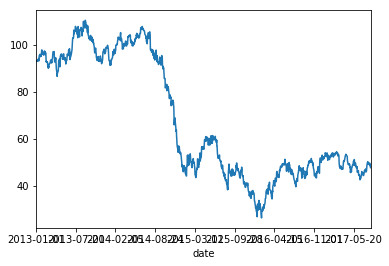

In [14]:
oil_plot = oil['dcoilwtico'].copy()
oil_plot.index = oil['date'].copy()
oil_plot.plot()
plt.show()